In [1]:
# pip install tweepy
# pip install wordcloud

In [2]:
import tweepy
import wordcloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
api_key = "LwrH0T5H6u1wzWOCnMlVSoRh5"
api_secret = "LVfLXMbcGzZ6NZdL3W48TnoXuFR1ye09Cx2ATg6UROj9XVfBmE"
access_token = "857530568-uDGZXVf1KlmgBB0C3Ijxa0RFMQYQ2Tb3nOuLQlmc"
access_token_secret = "fcv9xvEFU7aJ1sYWC5GfPnJU6lSX0y6ZE2BKwM7aPGoSX"

In [4]:
# create an API to load data from twitter
auth = tweepy.OAuthHandler(api_key,api_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [27]:
tweet_data = api.search(q="Donald Trump",count=50)

In [44]:
sentiment = []
tweet_text =""
clean_tweets = []
for tweet in tweet_data:
    tweet = tweet.text
    tweet = re.sub("RT","",tweet)
    tweet = re.sub("@+[a-zA-Z0-9:]+","",tweet)
    tweet = re.sub("https://+[a-zA-Z0-9.\/]+","",tweet)
    tweet_text = tweet_text+ " "+tweet
    print(tweet)
    clean_tweets.append(tweet)
    tweet = TextBlob(tweet)
    if tweet.sentiment.polarity>0.1:
        print("positive")
        sentiment.append("positive")
    elif tweet.sentiment.polarity<-0.1:
        print("negative")
        sentiment.append("negative")
    else:
        print("Neutral")
        sentiment.append("neutral")
    print("\n ************************ \n")

    You forgot to mention that this is all Donald Trump's fault. He stole the last stimulus for h…
Neutral

 ************************ 

  The fact is, Iran is closer to a nuclear bomb today than it was when Donald Trump took office.

Every day he’s in charge of o…
Neutral

 ************************ 

#News - Donald Trump Said He’s ‘Entitled’ to a Third Term—And People Are Reacting Accordingly 
Neutral

 ************************ 

 _9: #StopAntiStateJournalism

Fake news might be US President Donald Trump’s favourite trump. However, it predates him and spans acr…
negative

 ************************ 

  Donald Trump: People should inject themselves with bleach. 

Reasonable people: I want to listen to experts and not Donal…
positive

 ************************ 

  📺 NEW VIDEO

Retweet if you are ready to use the Republican playbook against Republicans. Donald Trump cannot be trusted w…
positive

 ************************ 

  When I call dotard a "mobster," I'm not being cute.
Or provocati

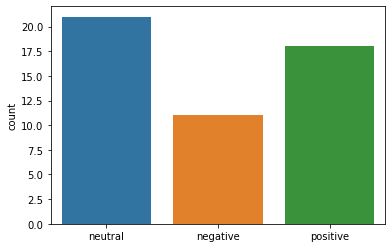

In [45]:
sns.countplot(sentiment)
plt.show()

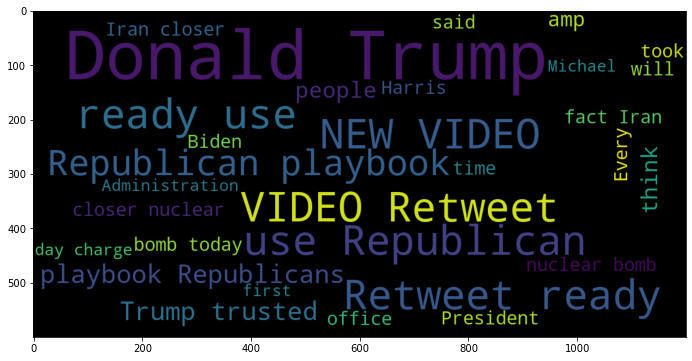

In [46]:
wd = wordcloud.WordCloud(height=600,width=1200,max_words=30).generate_from_text(tweet_text)
plt.figure(figsize=(12,6))
plt.imshow(wd)
plt.show()

In [40]:
# conda install spacy

## Named Entity Recognition

In [52]:
import spacy
from spacy import displacy

In [43]:
nlp = spacy.load('en')

In [54]:
for tweet in clean_tweets:
    tw = nlp(tweet)
    displacy.render(tw.ents,style='ent',jupyter=True)
    print("\n")